In [1]:
import numpy as np
import scipy.io as sio
import mat73 

import os
# os.chdir('/home/victorh/projects/gtx/utils')
os.chdir('/home/victorhuang/projects/gtx/utils')

from draw_stuff import *

In [2]:
def read_mat_data(path):
    mat_data = mat73.loadmat(path)
    return {
        'fluorescence': mat_data['F'],
        'op': mat_data['OP'],
        'depth': mat_data['DF'],
        'concentration_fluor': mat_data['QF'],
        'reflectance': mat_data['RE']
    }

In [3]:
def drop_samples(data_dict, drop_indices):
    """
    Drop multiple samples from the first axis of each ndarray in the dictionary.
    """
    drop_indices = sorted(set(drop_indices))  # make sure they are sorted and unique
    return {
        key: np.delete(value, drop_indices, axis=0)
        for key, value in data_dict.items()
        if isinstance(value, np.ndarray)
    }

In [4]:
def get_data(idx, data_list):
    return {
        'fluorescence': data_list['fluorescence'][idx,...],
        'op': data_list['op'][idx,...],
        'depth': data_list['depth'][idx,...],
        'concentration_fluor': data_list['concentration_fluor'][idx,...],
        'reflectance': data_list['reflectance'][idx,...]
    }

In [5]:
def stack_data_dicts(dict_list):
    """
    Stack multiple data dictionaries along the first (batch) axis.
    Assumes all dicts have the same keys and matching shapes after axis=0.
    """
    keys = dict_list[0].keys()
    stacked = {
        key: np.concatenate([d[key] for d in dict_list], axis=0)
        for key in keys
    }
    return stacked

In [6]:
def save_mat_data(path, data_dict):
    """
    Save the stacked data dictionary to a .mat file in v7.3 format.
    """
    mat73.savemat(path, data_dict)

In [7]:
def read_to_ram(path):
    sample_1 = read_mat_data(path)
    assert sample_1['fluorescence'].shape == (1000, 100, 100, 6)
    assert sample_1['reflectance'].shape == (1000, 100, 100, 6)
    assert sample_1['op'].shape == (1000, 100, 100, 2) 
    assert sample_1['depth'].shape == (1000, 100, 100)
    assert sample_1['concentration_fluor'].shape == (1000, 100, 100)
    print(f"finished reading {sample_1['op'].shape[0]} images")
    return sample_1

In [9]:
sample = read_mat_data('../data/DL_nImages1000.mat')

In [11]:
print(np.mean(sample['op'][..., 0]))
print(np.mean(sample['op'][..., 1]))

print(np.std(sample['op'][..., 0]))
print(np.std(sample['op'][..., 1]))


0.050162114
1.6236666
0.01079325
0.40413398


In [13]:
sample_1 = read_to_ram('../data/mcx/1_DL_nImages1000_newOP.mat')
sample_2 = read_to_ram('../data/mcx/2_DL_nImages1000_newOP.mat')
sample_3 = read_to_ram('../data/mcx/3_DL_nImages1000_newOP.mat')
sample_4 = read_to_ram('../data/mcx/4_DL_nImages1000_newOP.mat')
sample_5 = read_to_ram('../data/mcx/5_DL_nImages1000_newOP.mat')
sample_6 = read_to_ram('../data/mcx/6_DL_nImages1000_newOP.mat')
sample_7 = read_to_ram('../data/mcx/7_DL_nImages1000_newOP.mat')
sample_8 = read_to_ram('../data/mcx/8_DL_nImages1000_newOP.mat')
sample_9 = read_to_ram('../data/mcx/9_DL_nImages1000_newOP.mat')
sample_10 = read_to_ram('../data/mcx/10_DL_nImages1000_newOP.mat')

finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images
finished reading 1000 images


In [ ]:
# 7: 943, # 8: 586, #10: 297, 656

In [14]:
sample_7_drop = drop_samples(sample_7, [943])
sample_8_drop = drop_samples(sample_8, [586])
sample_10_drop = drop_samples(sample_10, [297, 656])

print(sample_7_drop['op'].shape)
print(sample_8_drop['op'].shape)
print(sample_10_drop['op'].shape)

(999, 100, 100, 2)
(999, 100, 100, 2)
(998, 100, 100, 2)


In [15]:
data_list = [sample_1, sample_2, sample_3, sample_4, sample_5, sample_6, sample_7_drop, sample_8_drop, sample_9, sample_10_drop]
stacked = stack_data_dicts(data_list)

In [20]:
import scipy.io as sio

In [21]:
sio.savemat('../data/20250912_mcx_9996.mat', stacked)

In [23]:
tmp = sio.loadmat('../data/20250912_mcx_9996.mat')


In [14]:
for i in range(1000):
    d = get_data(i, sample)
    mua = d['op'][..., 0]
    mus = d['op'][..., 1]
    
    assert np.mean(mua) > 0
    assert np.mean(mus) > 0.9
        

In [ ]:
for i in range(10):
    d = get_data(i, sample_10_drop)
    mean_val = np.mean(d['op'][..., 0])
    
    if np.isnan(mean_val):
        print(f"{i} -> mean is NaN")
    elif mean_val <= 0:
        print(f"{i} -> mean is {mean_val:.4f} (<= 0)")
    
    # assert mean_val > 0
    # assert np.mean(sample_1['op'][..., 1]) > 1

0.004137032
0.92107755


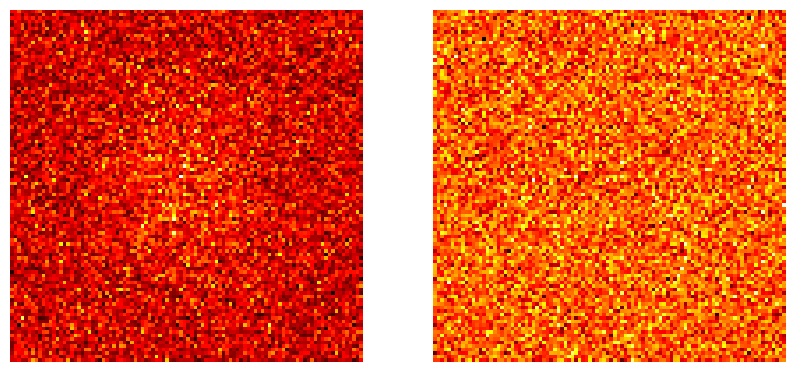

In [129]:
sample_1 = get_data(9, sample)
print(np.mean(sample_1['op'][..., 0]))
print(np.mean(sample_1['op'][..., 1]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    axs[i].imshow(sample_1['op'][:, :, i], cmap='hot', interpolation='nearest')
    axs[i].axis('off')